**Assignment 5: Knowledge & Reasoning (Given: 21 Mar 2023, Due: 9 Apr 2023)**


**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle on the due date. 
* Your code should be well commented and should be compatible with python3.
* For this assignment, you are allowed to import the libraries `pycosat`, `matplotlib`, `random` and `numpy` of python3. No other libraries may be imported.
* To start the jupyter notebook in the lab machine, enter
`source /opt/anaconda3/bin/activate base` (note the space after `source` and before `base`) in the terminal and then type `jupter notebook`
* Again, in the lab machines, if you are getting an error when importing `pycosat` saying that package is not installed, run `!pip3 install pycosat` in a jupyter notebook and install.

# Island of Knights and Knaves

Consider the island of Knights and Knaves where each inhabitant is either a knight or a knave. A knight always tells the truth: if knight states a sentence, then that sentence is true. A knave always lies: if a knave states a sentence, then that sentence is false. Now, given a set of statements mentioned by some inhabitants, the problem is to determine whether each of these inhabitants is a knight or a knave. This problem can be expressed as a Satisfiability problem of a Boolean formula. 

For example, consider the following statements by three people, 

 * A says either "I am a knight" or "I am a knave", but you don't know which.
 * B says "A said I am a knave"
 * B says "C is a knave"
 * C says "A is a knight"

We will now show how to solve this puzzle by expressing facts about the island and the statements made by the inhabitants as propositional statements in CNF (Conjunctive Normal Form) and solve for a satisfying assignment by calling a standard SAT solving algorithm. We will use the `pycosat` which is wrapper for *picosat* SAT solver written in C.

(a) For each person X introduce appropriate variables to capture whether X is a knight or a knave.  Using these variables, introduce appropriate propositional statements that (1) capture that each person is either a knight or a knave, and (2) exactly matches the statements that each of them makes about themselves or others. Write these statements as text (in [markdown](https://www.markdownguide.org/basic-syntax/)) in the cell below.

Let A, B, C be the variables that capture whether the person is a knight or a Knave.<br>
The variable being true indicates that the person is knight and false indicates knave.<br>
Statement 1) A <=> (A ∨ ~A)<br>
Statement 2) B => (A => ~B)<br>
Statement 3) B <=> ~C<br>
Statement 4) C <=> A<br>

(b) Convert the above expressions to CNF formulas in the format used in `pycosat`.

The above statements in CNF form<br>
Statement 1) A<br>
Statement 2) \~B ∨ \~A<br>
Statement 3) (\~B ∨ \~C) ^ (B ∨ C)<br>
Statement 4) (\~C ∨ A) ^ (\~A ∨ C)<br>
Since pycosat takes the values in the form of integers so let 1 be A, 2 be B, 3 be C<br>
Now the CNF form of these statements are as follows<br>
Statement 1) 1<br>
Statement 2) -2 ∨ -1<br>
Statement 3) (-2 ∨ -3) ^ (2 ∨ 3)<br>
Statement 4) (-3 ∨ 1) ^ (-1 ∨ 3)<br>

(c) Invoke the solver in `pycosat` and find who among A, B and C are knights and  knaves. 

In [18]:
import pycosat
cnf = [[1],[-2,-1],[-2,-3],[2,3],[-3,1],[-1,3]]
temp = pycosat.solve(cnf)
if(temp[0]>0):
    print("A is a Knight")
else:
    print("A is a Knave")
if(temp[1]>0):
    print("B is a Knight")
else:
    print("B is a Knave")
if(temp[2]>0):
    print("C is a Knight")
else:
    print("C is a Knave")

A is a Knight
B is a Knave
C is a Knight


(d) Repeat parts (a)-(c) for the following sets of statements. In these statements, there are only two inhabitants of the island.

i. A says "At least one of us is a knave" and B says nothing.

ii. A says "We are the same kind", B says "We are of different kinds"




Statment i.<br>
Here, we only have 2 people, hence let A and B be the variables representing person A and B,
value of the variable being true means the person is knight<br>
The first statement is represented as a propositional statement:<br>
    A <=> (~A or ~B)<br>
Converting the above statement into cnf results in:<br>
    A and ~B<br>
which in the form readable by pycosat is (1 and -2)<br>

In [19]:
import pycosat
# set 1

cnf1 = [[1], [-2]]
temp = pycosat.solve(cnf1)
if(temp[0]>0):
    print("A is a Knight")
else:
    print("A is a Knave")
if(temp[1]>0):
    print("B is a Knight")
else:
    print("B is a Knave")

A is a Knight
B is a Knave


Statement ii.<br>
The statements are represented as a propositional statement:<br>
    1) A <=> ((\~A and \~B) or (A and B))<br>
    2) B <=> ((\~A and B) or (A and \~B))<br>
Converting the above statement into cnf results in:<br>
    1) B<br>
    2) \~A<br>
which in the form readable by pycosat is (-1 and 2)<br>

In [20]:
import pycosat
# set 2

cnf2 = [[-1], [2]]
temp = pycosat.solve(cnf2)
if(temp[0]>0):
    print("A is a Knight")
else:
    print("A is a Knave")
if(temp[1]>0):
    print("B is a Knight")
else:
    print("B is a Knave")

A is a Knave
B is a Knight


# Binary Town 


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

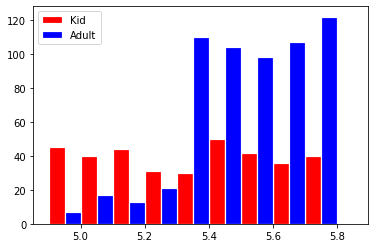

In [21]:
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
pKid = 0.4
ppl = choice([0, 1], 1000, p = [pKid, 1-pKid])         #this list stores which kind is this person, 0 means kid,1 means adult
htSet = [4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8]      #the set of all possible heights
pHtKid = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]     #storing the given probabilities of height
pHtAdult = [0.02,0.02,0.02,0.02,0.02,0.18,0.18,0.18,0.18,0.18]
kidhts = []                   #this list will store the heights of all kids
adulthts = []                 #this list will store the heights of all adults
hts = []                      #this list will store the heights of all people
for i in range(len(ppl)):
    if ppl[i]==0:                                       #if the person is kid
        kidhts.append(choice(htSet, 1, p = pHtKid)[0])  #randomly selecting a height from height set with the weighted probability
        hts.append(kidhts[-1])                          #appending the same value to the list with heights of all people
    else:                                               #if this person is adult, repeat the same with different probability
        adulthts.append(choice(htSet, 1, p = pHtAdult)[0])
        hts.append(adulthts[-1])

plt.hist(kidhts, color='Red', label='Kid', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.9, 5.9, 0.1))        #plotting the results
plt.hist(adulthts, color='Blue', label='Adult', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.95, 5.95, 0.1))
plt.legend()
plt.show()

(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [22]:
from numpy.random import choice
pH = []           
bayes=[]
for i in range(len(htSet)):
    pH.append(hts.count(htSet[i])/1000)   #this list will store the probability of a specific height by the frequency

for i in range(1000):
    ind = htSet.index(hts[i])          #finding the index of each height in hts, in the htSet
    phk = (0.4*pHtKid[ind])/pH[ind]    #bayes' rule, by getting the value of pH at the corresponding index
    pha = (0.6*pHtAdult[ind])/pH[ind]  #the same bayes' rule expression, for all adults
    if(phk>=0.5):
        temp = 0
    else:
        temp = 1
    bayes.append(temp)   #this list will store the predictions according to the bayes' rule
#print(bayes)
accuracy = 0
for i in range(len(bayes)):    #calculating its accuracy
    if(bayes[i]==ppl[i]):
        accuracy += 1
print(f"The accuracy of bayes' rule predictions is {accuracy/1000}")

The accuracy of bayes' rule predictions is 0.731


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

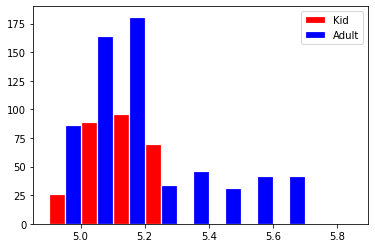

In [23]:
import random
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
def cdf(prob, ka):    #returns height for a given probability
    if prob <= 0.5:
        if ka == 0:   #if the person is a kid
            ht = 4.5 + prob         #the case where height is from 4.5 to 5 for a kid
        if ka == 1:   #if the person is an adult
            ht = (prob + 10) / 2    #the case where height is from 5 to 5.25 for an adult
    else:
        if ka == 0:     
            ht = (prob + 9.5) / 2   #the case where height is from 5 to 5.25 for a kid
        if ka == 1:
            ht = prob + 4.75        #the case where height is from 5.25 to 5.75 for an adult
    return ht

ppl = choice([0, 1], 1000, p = [0.4, 0.6])    #this list stores which kind is this person, 0 means kid,1 means adult
nhts = []                                     #this list will store the heights of all people
nkidhts = []                                  #this list will store the heights of all kids
nadulthts = []                                #this list will store the heights of all adults

for i in range(1000):
    a=random.uniform(0,0.5)
    b=random.uniform(0.5,1)
    if ppl[i]==0:
        prob = np.random.choice([a,b],1,p=[1/3,2/3])[0] #the values 1/3 and 2/3 are as per the given probability
        ht = cdf(prob, 0)           #the second parameter is for kid/adult
        nhts.append(ht)             #appending in the height list
        nkidhts.append(ht)          #appending in the kids' height list
    else:                           #repeating the similar procedure for adult
        prob = np.random.choice([a,b],1,p=[2/3,1/3])[0]
        ht = cdf(prob, 1)
        nhts.append(ht)
        nadulthts.append(ht)
        
plt.hist(nkidhts, color='Red', label='Kid', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.9, 5.9, 0.1))
plt.hist(nadulthts, color='Blue', label='Adult', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.95, 5.95, 0.1))
plt.legend()
plt.show()

In [24]:
#(b) part for c
from numpy.random import choice

def prob(ht, ka):     #this function returns the probability as per the given input of height and the type of function
    if ka == 0:
        if ht >= 4.5 and ht <= 5:    #in this range only kid has a non zero probability, hence the return is 1
            return 1
        elif ht >= 5 and ht <= 5.25: #the return 0.4 is as per the given value of pKid
            return 0.4
        else:                        #else return 0
            return 0
    else:
        if ht >= 5 and ht <= 5.25:   #the value 1-pKid
            return 0.6
        elif ht >= 5.25 and ht <= 5.75:  #in this range only adult has a non zero probability, hence the return is 1
            return 1
        else:
            return 0

nbayes = []   #list to store the predictions according to bayes' rule
for i in range(len(nhts)):
    nphk = prob(nhts[i], 0)   #for each height in nhts, we get the probability from the function for both kid and adult
    npha = prob(nhts[i], 1)
    if nphk>=0.5:
        temp = 0
    else:
        temp = 1
    nbayes.append(temp)    #appending the majority selection in the prediction list
accuracy = 0
for i in range(1000):    #finding the accuracy
    if ppl[i]==nbayes[i]:
        accuracy += 1
print(f"The accuracy of bayes' rule predictions is {accuracy/1000}")

The accuracy of bayes' rule predictions is 0.745


(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





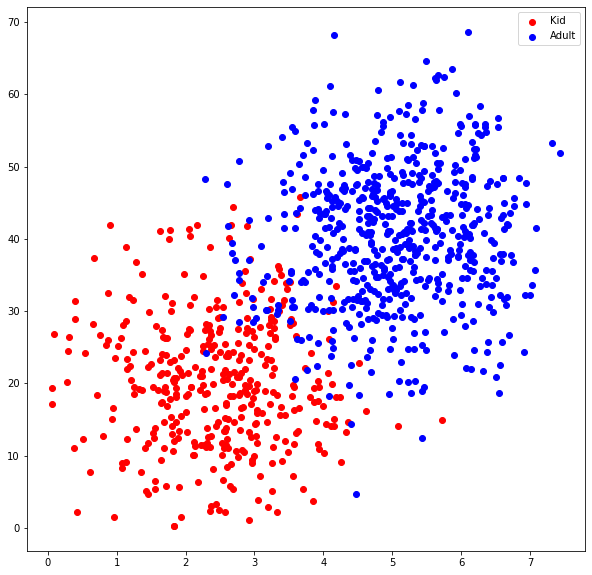

In [25]:
import random
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt

ppl = np.random.choice([0,1],1000,p=[0.4,0.6])    #this list stores which kind is this person, 0 means kid,1 means adult

ghts = []                  #storing all heights
whts = []                  #storing all weights
gprobkid = []              #storing height for kid
wprobkid = []              #storing weight for kid
gprobadult = []            #storing height for adult
wprobadult = []            #storing weight for adult
nppl = []                  #making a copy of the original ppl list for next question
for i in range(1000):      #for each person
    if ppl[i] == 0:        #if the person is a kid
        hk = np.random.normal(2.5, 1, 1)  #random height and weight using numpy
        wk = np.random.normal(20, 10, 1)  
        if hk < 0 or wk < 0:              #discarding the negative values
            continue
        else:
            gprobkid.append(hk)           #storing the values in corresponding lists
            wprobkid.append(wk)
            ghts.append(hk)
            whts.append(wk)
            nppl.append(ppl[i])
    else:                  #if the person is adult
        ha = np.random.normal(5, 1, 1)    #random height and weight using numpy
        wa = np.random.normal(40, 10, 1)
        if ha < 0 or wa < 0:              #discarding the negative values
            continue
        else:
            gprobadult.append(ha)         #storing the values in corresponding lists
            wprobadult.append(wa)
            ghts.append(ha)
            whts.append(wa)
            nppl.append(ppl[i])

plt.figure(figsize=(10,10))
plt.scatter(gprobkid, wprobkid, c='Red', label='Kid')          #plotting the result
plt.scatter(gprobadult, wprobadult, c='Blue', label='Adult')
plt.legend()
plt.show()

(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

Enter height : 4
Enter weight : 5
The prediction is that the given point 4 and 5 is representing a kid
The prediction is that the given point 4 and 5 is representing a kid
The prediction is that the given point 4 and 5 is representing a kid


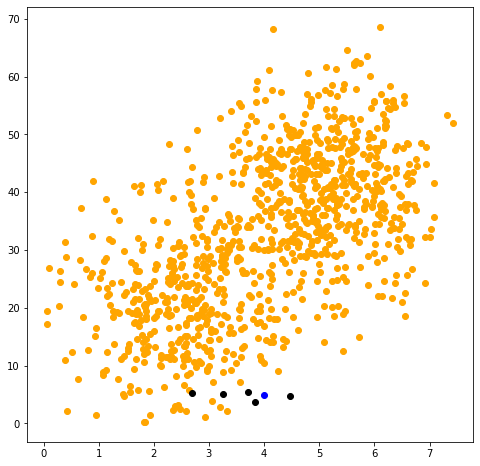

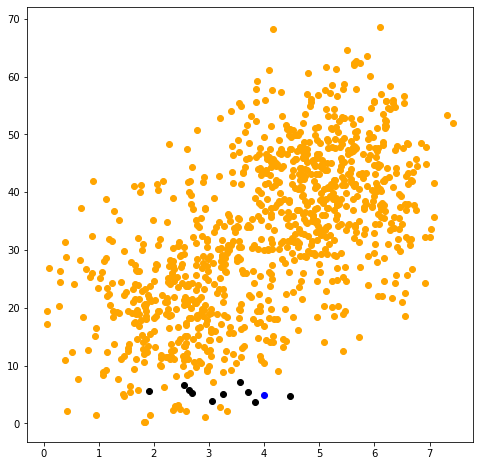

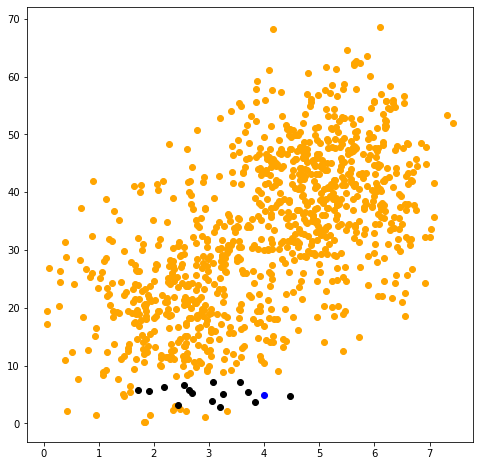

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def majority_class(neigh_ht, neigh_wt):     #returns the majority class, by calculating the mode
    kid_c, adult_c = 0, 0
    for i in range(len(neigh_ht)):          #for each height in the neihghbor
        if neigh_ht[i] in gprobkid:         #if the person is a kid
            temp = []                       
            for j in range(len(gprobkid)):   #we will find the indices of the neighbors in the original list
                if gprobkid[j]==neigh_ht[i]: 
                    temp.append(j)
            for j in range(len(temp)):       
                if wprobkid[temp[j]]==neigh_wt[i]:  #if the weight is also found, we increase the count of number of kids by 1
                    kid_c += 1
                    break
        if neigh_ht[i] in gprobadult:       #if the person is an adult
            temp = []
            for j in range(len(gprobadult)): #we will find the indices of the neighbors in the original list
                if gprobadult[j]==neigh_ht[i]:
                    temp.append(j)
            for j in range(len(temp)):
                if wprobadult[temp[j]]==neigh_wt[i]: #if the weight is also found, we increase the count of number of kids by 1
                    adult_c += 1
                    break
    if kid_c > adult_c:              #if the number of kids are more
        return 0
    elif kid_c < adult_c:            #if the number of adults are more
        return 1
    else:                            #else return one
        return -1

hIn = int(input("Enter height : "))  #taking the input
wIn = int(input("Enter weight : "))
#hIn = 1
#wIn = 1
k_list = [5, 10, 15]

for k in k_list:     #for each value of k
    neigh_ht = []    #storing the heights of minimum distance neighbors
    neigh_wt = []    #storing the weights of minimum distance neighbors
    dist = []        #this list stores the distance of each point
    tghts = ghts.copy()
    twhts = whts.copy()
    tppl = nppl.copy()
    for i in range(len(tghts)):   #getting the distance for each point
        dist.append(((tghts[i]-hIn)**2+(twhts[i]-wIn)**2)**0.5)
    
    for i in range(k):    #getting the k nearest neighbors
        min_ind = dist.index(min(dist))   #getting the index of minimum distance neighbor
        neigh_ht.append(tghts[min_ind])    #storing the corresponding values in the lists
        neigh_wt.append(twhts[min_ind])
        dist.remove(dist[min_ind])        #removing the current values for next iteration
        tghts.remove(tghts[min_ind])
        twhts.remove(twhts[min_ind])
        tppl.remove(tppl[min_ind])
         
    plt.figure(figsize=(8,8))               #plotting for the current value of k
    plt.scatter(hIn, wIn, color='blue')
    plt.scatter(tghts, twhts, color='orange')
    plt.scatter(neigh_ht, neigh_wt, color='black')
    #plt.show()
    prediction = majority_class(neigh_ht, neigh_wt)     #making the prediction as per the majority function
    if prediction == 0:                          #printing the corresponding prediction
        print(f"The prediction is that the given point {hIn} and {wIn} is representing a kid")
    elif prediction == 1:
        print(f"The prediction is that the given point {hIn} and {wIn} is representing an adult")
    else:
        print(f"The prediction is that the given point {hIn} and {wIn} is representing no majority")

# Optimal First Batting Strategy 

Recall the cricket game simulation that we discussed in Assignment 2. Consider a one-day cricket match. Each
innings consists of 300 balls ignoring no balls, runouts and overthrows. At any point of time, treat the pair of batsmen playing as a single player. That is, there are 10 players, namely, $(1, 2),(2, 3), \ldots ,(10, 11)$. For every player, there are 5 possible shots: $A=\{1, 2, 3, 4, 6\}$. Each of these shots is associated with the risk of the player getting dismissed and this risk varies from player to player. The probabilities of getting dismissed for Player $(1, 2)$ is $pOutMin = [0.01, 0.02, 0.03, 0.1, 0.3]$ and for Player $(10, 11)$ is $pOutMax = [0.1, 0.2, 0.3, 0.5, 0.7]$,  where the ith entry is for the ith action. If there are $w$ wickets in hand, then use the formula 

$$pOut(a, w) = pOutMax(a) + (pOutMin(a) - pOutMax(a)) \times (w- 1)/9)$$ 

to calculate the probabilities of Player $(11-w, 11-w+1)$ getting dismissed for  where $w \in [10]$. Note that $pOut(a, 1)=pOutMin(a)$ and $pOut(a, 10)=pOutMax(a)$. You may assume that if the player does not get out, then the runs corresponding to the shot played is scored.



Let us formulate an optimal strategy for the team batting first. Let $b$ be the number of balls left and $w$ be the wickets in hand. Let $BestScore(b,w)$ be the
maximum expected score under an optimal policy in the remaining $b$ balls with $w$ wickets in hand. Note that no matter what the actual score is, the player should maximize the expected score in the remaining part of the game. Use the boundary conditions $BestScore(0,w)=0$ for each $w$ and $BestScore(b,0)=0$ for each $b$. 

Hint: For $b \in [300]$ and $w \in [10]$, $BestScore(b,w)=\max_a (a+BestScore(b-1,w))$ if the player does not get out in the $b$th ball and $BestScore(b,w)= BestScore(b-1,w-1)$ if the player gets out in the $b$th ball.






(a) Implement an optimal batting-first strategy by computing $BestScore(b,w)$ for each $b \in [300]$ and $w \in [10] \cup \{0\}$ using dynamic programming. Simulate 10 matches and bat according to the optimal policy. Output the optimal action (the recommended shot $BestShot(b,w)$) and the value (total expected score $BestScore(b,w)$ in the remainder of the game) for each pair $(b,w)$ where $b$ is the number of balls left and $w$ is the number of wickets left. Note that $BestShot(b,w)$ denotes the shot to be taken when there are $b$ balls and $w$ wickets left so that $BestScore(b,w)$ is attained. 



In [27]:
import numpy as np
 
def probOut(ac, w):          #this function returns the value of pOut for each action and as per the corresponding number of wickets remaining
    return pOutMax[ac]+(pOutMin[ac] - pOutMax[ac])*(w)/9

def best():                  #this function makes a matrix that stores the best scores and best actions for each possible scenario
    bestScore = np.zeros((301,11))    #making the empty bestscore and bestaction matrices
    bestAction = np.zeros((301,11))
    for i in range(1, 301):          #for each cell in the matrix
        for j in range(1, 11):
            currAction = 0           #this will store the best action for each situation
            maxScore = -1            #this will store the maximum possible score after considering all actions
            expectedScore = 0        #this will be used to compare all the expected scores for each action(considering their probability)
            for ac in actions:       #checking for each action
                runs = ac + bestScore[i-1][j]   #new runs, after the action is taken
                if ac != 6:                     #the action 6 has the address of ac-2, in the list of all actions
                    tpout = probOut(ac-1, j-1)
                else:
                    tpout = probOut(ac-2, j-1)
                    
                expectedScore = (1-tpout)*runs  + tpout*bestScore[i-1][j-1]   #this is an estimate considering the probability of the player getting out, 
                                                                              #hence the algorithm needs to take the action that maximises this value at each ball
                if expectedScore > bestScore[i][j]:        #if the expected score is better after the action, update the max score and best action
                    bestScore[i][j] = expectedScore
                    bestAction[i][j] = ac
    return bestScore, bestAction                #return the final matrices

pOutMin = np.array([0.01, 0.02, 0.03, 0.1, 0.3]) #defining the given probabilities in lists
pOutMax = np.array([0.1, 0.2, 0.3, 0.5, 0.7])
actions = [1,2,3,4,6]

bestScore, bestAction = best()   #getting the matrix that has the best actions for all situations of wickets and balls
runs = 0
for i in range(10):     #playing the game 10 times
    w = 10              #initialising the number of wickets left and runs
    runs = 0
    for b in range(1, 301):   #for each ball
        if w == 0:            #if no wickets are left, end the match
            break
        ac = int(bestAction[301-b][w])   #getting the best possible action
        bs = bestScore[301-b][w]    #getting the best expected score
        print(f"The optimal action is {ac} and best expected score is {int(bs)} for ({301-b}, {w}) (balls left and wickets left)")
        if ac != 6:                 #making random choice if the player is out or not out
            out = np.random.choice([0, 1], p=[probOut(ac-1,w-1), 1-probOut(ac-1,w-1)]) #0 means out
        else:
            out = np.random.choice([0, 1], p=[probOut(ac-2,w-1), 1-probOut(ac-2,w-1)])
        if out == 0:                #if player is out
            print("Player is out")
            w -= 1
        else:                       #else add the runs as per the action
            runs += ac
    print(f"Total runs in this match is {runs}")

The optimal action is 2 and best expected score is 279 for (300, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (299, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (298, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (297, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (296, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (295, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (294, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (293, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (292, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 279 for (291, 10) (balls left and wickets left)
The optima

The optimal action is 1 and best expected score is 59 for (184, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (183, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (182, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (181, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (180, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (179, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (178, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (177, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (176, 5) (balls left and wickets left)
The optimal action is 1 and best expected score is 59 for (175, 5) (balls left and wickets left)
The optimal action is 1 and be

(b) What is your observation on the optimal strategy? Is it a good idea to bat slowly during the early part of the game, keeping wickets in hand? This usually allows a steady increase in the scoring rate, and often results in a last-minute rush of runs and wickets during the final part of the innings. Or is it better to score quickly in the early part of the innings? How would the optimal strategy change if there is a chance that a player does not score the runs for a particular shot despite not getting dismissed. Taking $pRunMin = 0.5$, and $pRunMax = 0.8$,  when the player is not getting out, the probability of successfully obtaining the runs for that shot is given by $pRun(w) = pRunMin + (pRunMax - pRunMin) \times ((w - 1)/9).$

In [28]:
import numpy as np

def probOut(ac, w):          #this function returns the value of pOut for each action and as per the corresponding number of wickets remaining
    return pOutMax[ac]+(pOutMin[ac] - pOutMax[ac])*(w)/9

def best():                  #this function makes a matrix that stores the best scores and best actions for each possible scenario
    bestScore = np.zeros((301,11))    #making the empty bestscore and bestaction matrices
    bestAction = np.zeros((301,11))
    for i in range(1, 301):          #for each cell in the matrix
        for j in range(1, 11):
            currAction = 0           #this will store the best action for each situation
            maxScore = -1            #this will store the maximum possible score after considering all actions
            expectedScore = 0        #this will be used to compare all the expected scores for each action(considering their probability)
            for ac in actions:       #checking for each action
                runs = ac + bestScore[i-1][j]   #new runs, after the action is taken
                if ac != 6:                     #the action 6 has the address of ac-2, in the list of all actions
                    tpout = probOut(ac-1, j-1)
                else:
                    tpout = probOut(ac-2, j-1)
                
                expectedScore = (1-tpout)*(pRun[j-1]*runs + (1-pRun[j-1])*bestScore[i-1][j])  + tpout*bestScore[i-1][j-1] #now the exptected score will depend of prun is the player is not out
                if expectedScore > bestScore[i][j]:        #if the expected score is better after the action, update the max score and best action
                    bestScore[i][j] = expectedScore
                    bestAction[i][j] = ac
    return bestScore, bestAction                #return the final matrices               #return the final matrices

pOutMin = np.array([0.01, 0.02, 0.03, 0.1, 0.3]) #defining the given probabilities in lists
pOutMax = np.array([0.1, 0.2, 0.3, 0.5, 0.7])
actions = [1,2,3,4,6]

pRun = np.zeros(10)                             #Storing probability of scoring runs
pRunMin = 0.5 
pRunMax = 0.8 
for i in range(10):
    pRun[i] =pRunMin+(pRunMax-pRunMin)*((i)/9) #using the given formula

bestScore, bestAction = best()
for i in range(10):     #playing the game 10 times
    w = 10              #initialising the number of wickets left and runs
    runs = 0
    for b in range(1, 301):   #for each ball
        if w == 0:            #if no wickets are left, end the match
            break
        ac = int(bestAction[301-b][w])   #getting the best possible action
        bs = bestScore[301-b][w]    #getting the best expected score
        print(f"The optimal action is {ac} and best expected score is {int(bs)} for ({301-b}, {w}) (balls left and wickets left)")
        if ac != 6:                 #making random choice if the player is out or not out
            out = np.random.choice([0, 1], p=[probOut(ac-1,w-1), 1-probOut(ac-1,w-1)]) #0 means out
        else:
            out = np.random.choice([0, 1], p=[probOut(ac-2,w-1), 1-probOut(ac-2,w-1)])
        if out == 0:                #if player is out
            print("Player is out")
            w -= 1
        else:                       #else choose randomly if the players scores, r it is a dot ball
            rd = np.random.choice([0, 1],p=[pRun[w-1],1-pRun[w-1]])
            if rd == 0:
                runs += ac
    print(f"Total runs in this match is {runs}")

The optimal action is 2 and best expected score is 202 for (300, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 202 for (299, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (298, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (297, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (296, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (295, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (294, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (293, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (292, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (291, 10) (balls left and wickets left)
The optima

The optimal action is 1 and best expected score is 24 for (113, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (112, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (111, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (110, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (109, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (108, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (107, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (106, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (105, 4) (balls left and wickets left)
The optimal action is 1 and best expected score is 24 for (104, 4) (balls left and wickets left)
The optimal action is 1 and be

The optimal action is 2 and best expected score is 201 for (273, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (272, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (271, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (270, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (269, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (268, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (267, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (266, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (265, 10) (balls left and wickets left)
The optimal action is 2 and best expected score is 201 for (264, 10) (balls left and wickets left)
The optima